<a href="https://colab.research.google.com/github/hudaor/leaf-disease-1/blob/main/CNN1000epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CNN Model
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



# nb_epochs how much times you want to back propogate
# steps_per_epoch it will transfer that many images at 1 time
# & epochs means 'steps_per_epoch' will repeat that many times

# r = classifier.fit(
#         training_set,
#         steps_per_epoch=len(training_set),
#          epochs=20,
#         validation_data=test_set,
#         validation_steps=len(test_set),
#         verbose=True)
y = model.fit(
        training_set,
         epochs=5,
        validation_data=test_set,
        verbose=True,
        steps_per_epoch=700,
        validation_steps=180)




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/5
700/700 [==============================] - 1313s 2s/step - loss: 0.5878 - accuracy: 0.6745 - val_loss: 0.5279 - val_accuracy: 0.7354
Epoch 2/5
700/700 [==============================] - 1287s 2s/step - loss: 0.4670 - accuracy: 0.7831 - val_loss: 0.4958 - val_accuracy: 0.7566
Epoch 3/5
700/700 [==============================] - 1290s 2s/step - loss: 0.4173 - accuracy: 0.8100 - val_loss: 0.3896 - val_accuracy: 0.8274
Epoch 4/5
700/700 [==============================] - 1325s 2s/step - loss: 0.3846 - accuracy: 0.8238 - val_loss: 0.3463 - val_accuracy: 0.8420
Epoch 5/5
700/700 [==============================] - 1319s 2s/step - loss: 0.3615 - accuracy: 0.8372 - val_loss: 0.3942 - val_accuracy: 0.8194


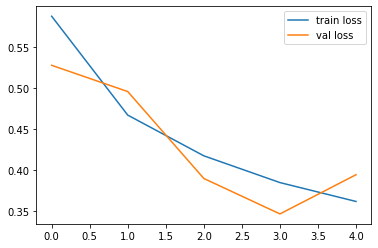

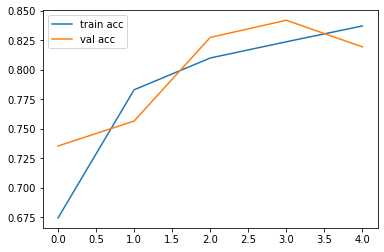

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(y.history['loss'], label='train loss')
plt.plot(y.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_lossCNN')

# plot the accuracy
plt.plot(y.history['accuracy'], label='train acc')
plt.plot(y.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accCNN')

In [ ]:

model.save('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn1.h5')
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y', y)



INFO:tensorflow:Assets written to: ram://07125e43-5d9a-415f-b11f-e66b005b9a15/assets


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
model90=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn1.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model90.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y90= model90.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=450,
    validation_steps=180
)


model90.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn2.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y90', y90)

Epoch 1/15
450/450 [==============================] - 922s 2s/step - loss: 0.3428 - accuracy: 0.8471 - val_loss: 0.3214 - val_accuracy: 0.8516
Epoch 2/15
450/450 [==============================] - 938s 2s/step - loss: 0.3210 - accuracy: 0.8589 - val_loss: 0.3134 - val_accuracy: 0.8634
Epoch 3/15
450/450 [==============================] - 914s 2s/step - loss: 0.3172 - accuracy: 0.8593 - val_loss: 0.3385 - val_accuracy: 0.8479
Epoch 4/15
450/450 [==============================] - 899s 2s/step - loss: 0.3097 - accuracy: 0.8608 - val_loss: 0.2753 - val_accuracy: 0.8762
Epoch 5/15
450/450 [==============================] - 947s 2s/step - loss: 0.3068 - accuracy: 0.8642 - val_loss: 0.3217 - val_accuracy: 0.8587
Epoch 6/15
450/450 [==============================] - 935s 2s/step - loss: 0.3022 - accuracy: 0.8687 - val_loss: 0.3725 - val_accuracy: 0.8373
Epoch 7/15
450/450 [==============================] - 933s 2s/step - loss: 0.2878 - accuracy: 0.8759 - val_loss: 0.2759 - val_accuracy: 0.8807

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


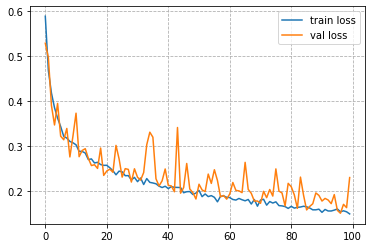

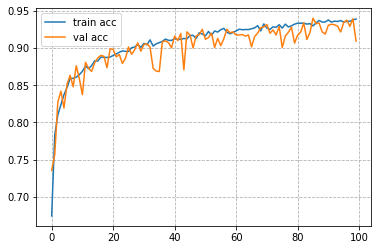

In [ ]:
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
read_r16= np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y.npy', allow_pickle='TRUE').item()
read_r17 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y90.npy',allow_pickle='TRUE').item()
read_r18 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y91.npy',allow_pickle='TRUE').item()
read_r19 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y92.npy',allow_pickle='TRUE').item()
read_r20 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y93.npy',allow_pickle='TRUE').item()
read_r21 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y94.npy',allow_pickle='TRUE').item()
read_r22 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y95.npy',allow_pickle='TRUE').item()
read_r23 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y96.npy',allow_pickle='TRUE').item()
read_r24 = np.load('/content/gdrive/MyDrive/2022dataset 05 2 22/y97.npy',allow_pickle='TRUE').item()



#for key, value in read_r16.history.items():
  #print(key)

#for key, value in read_r18.history.items():
  #print(key)

#for key, value in read_r19.history.items():
  #print(key)

#for key, value in read_r20.history.items():
  #print(key)

from tensorflow.keras.preprocessing import image
r_total_loss = read_r16.history['loss'] +read_r17.history['loss'] +read_r18.history['loss']+read_r19.history['loss']+read_r20.history['loss']+read_r21.history['loss']+read_r22.history['loss']+read_r24.history['loss']
r_total_val_loss = read_r16.history['val_loss']+read_r17.history['val_loss']+read_r18.history['val_loss'] +read_r19.history['val_loss'] +read_r20.history['val_loss'] +read_r21.history['val_loss']+read_r22.history['val_loss']+read_r24.history['val_loss']

r_total_accuracy = read_r16.history['accuracy'] +read_r17.history['accuracy']+read_r18.history['accuracy']+read_r19.history['accuracy']+read_r20.history['accuracy']+read_r21.history['accuracy']+read_r22.history['accuracy']+read_r24.history['accuracy']
r_total_val_accuracy =read_r16.history['val_accuracy']+read_r17.history['val_accuracy']+read_r18.history['val_accuracy']+read_r19.history['val_accuracy']+read_r20.history['val_accuracy']+read_r21.history['val_accuracy']+read_r22.history['val_accuracy']+read_r24.history['val_accuracy']


#r_total_loss = read_r16.history['loss'] + read_r18.history['loss']+  read_r19.history['loss']+read_r20.history['loss']
#r_total_val_loss = read_r16.history['val_loss'] + read_r18.history['val_loss']+ read_r19.history['val_loss']+read_r20.history['val_loss']

#r_total_accuracy = read_r16.history['accuracy']+ read_r18.history['acc']+ read_r19.history['acc']+read_r20.history['acc']
#r_total_val_accuracy =read_r16.history['val_accuracy'] + read_r18.history['val_acc']+ read_r19.history['val_acc']+read_r20.history['val_acc']



#print(read_r1.history['loss'])
from matplotlib import pyplot
pyplot.grid(linestyle='--')


# plot the loss
plt.plot(r_total_loss,  label='train loss')
plt.plot(r_total_val_loss, label='val loss')
plt.legend()

plt.savefig('LossVal_lossrcnn100epochs.pdf',format='pdf',dpi=800)
plt.show()
# plot the accuracy
plt.plot(r_total_accuracy, label='train acc')
plt.plot(r_total_val_accuracy , label='val acc')
plt.legend()
pyplot.grid(linestyle='--')

plt.savefig('AccVal_acccnn100epochs.pdf',format='pdf', dpi=800)

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



Mounted at /content/gdrive


In [ ]:


# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
model91=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn2.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model91.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y91= model91.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=450,
    validation_steps=180
)


model91.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn3.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y91', y91)

Epoch 1/15
450/450 [==============================] - 6521s 14s/step - loss: 0.2567 - accuracy: 0.8900 - val_loss: 0.2441 - val_accuracy: 0.8983
Epoch 2/15
450/450 [==============================] - 3708s 8s/step - loss: 0.2512 - accuracy: 0.8919 - val_loss: 0.2482 - val_accuracy: 0.8882
Epoch 3/15
450/450 [==============================] - 2402s 5s/step - loss: 0.2447 - accuracy: 0.8944 - val_loss: 0.2412 - val_accuracy: 0.8913
Epoch 4/15
450/450 [==============================] - 1762s 4s/step - loss: 0.2356 - accuracy: 0.8961 - val_loss: 0.3009 - val_accuracy: 0.8793
Epoch 5/15
450/450 [==============================] - 1330s 3s/step - loss: 0.2438 - accuracy: 0.8956 - val_loss: 0.2711 - val_accuracy: 0.8861
Epoch 6/15
450/450 [==============================] - 1134s 3s/step - loss: 0.2423 - accuracy: 0.8953 - val_loss: 0.2305 - val_accuracy: 0.9014
Epoch 7/15
450/450 [==============================] - 1061s 2s/step - loss: 0.2336 - accuracy: 0.9004 - val_loss: 0.2493 - val_accuracy

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


from tensorflow.keras.models import load_model
import numpy as np
model92=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn3.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model92.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y92= model92.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=450,
    validation_steps=180
)


model92.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn4.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y92', y92)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/15
450/450 [==============================] - 963s 2s/step - loss: 0.2175 - accuracy: 0.9072 - val_loss: 0.3191 - val_accuracy: 0.8684
Epoch 2/15
450/450 [==============================] - 974s 2s/step - loss: 0.2157 - accuracy: 0.9090 - val_loss: 0.2269 - val_accuracy: 0.9082
Epoch 3/15
450/450 [==============================] - 957s 2s/step - loss: 0.2104 - accuracy: 0.9120 - val_loss: 0.2108 - val_accuracy: 0.9097
Epoch 4/15
450/450 [==============================] - 1027s 2s/step - loss: 0.2074 - accuracy: 0.9103 - val_loss: 0.2223 - val_accuracy: 0.9071
Epoch 5/15
450/450 [==============================] - 952s 2s/step - loss: 0.2102 - accuracy: 0.9102 - val_loss: 0.2486 - val_accuracy: 0.9003
Epoch 6/15
450/450 [==============================] - 940s 2s/step -

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


from tensorflow.keras.models import load_model
import numpy as np
model93=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn4.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model93.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y93= model93.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=450,
    validation_steps=180
)


model93.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn5.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y93', y93)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/15
450/450 [==============================] - 880s 2s/step - loss: 0.2009 - accuracy: 0.9162 - val_loss: 0.2147 - val_accuracy: 0.9116
Epoch 2/15
450/450 [==============================] - 908s 2s/step - loss: 0.1871 - accuracy: 0.9223 - val_loss: 0.2020 - val_accuracy: 0.9141
Epoch 3/15
450/450 [==============================] - 955s 2s/step - loss: 0.1931 - accuracy: 0.9171 - val_loss: 0.1983 - val_accuracy: 0.9200
Epoch 4/15
450/450 [==============================] - 943s 2s/step - loss: 0.1872 - accuracy: 0.9229 - val_loss: 0.2372 - val_accuracy: 0.9007
Epoch 5/15
450/450 [==============================] - 969s 2s/step - loss: 0.1894 - accuracy: 0.9214 - val_loss: 0.2165 - val_accuracy: 0.9130
Epoch 6/15
450/450 [==============================] - 956s 2s/step - 

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


from tensorflow.keras.models import load_model
import numpy as np
model94=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn5.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model94.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y94= model94.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=450,
    validation_steps=180
)


model94.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn6.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y94', y94)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/15
450/450 [==============================] - 5112s 11s/step - loss: 0.1779 - accuracy: 0.9259 - val_loss: 0.2633 - val_accuracy: 0.9016
Epoch 2/15
450/450 [==============================] - 2682s 6s/step - loss: 0.1808 - accuracy: 0.9269 - val_loss: 0.2033 - val_accuracy: 0.9153
Epoch 3/15
450/450 [==============================] - 1813s 4s/step - loss: 0.1707 - accuracy: 0.9301 - val_loss: 0.1945 - val_accuracy: 0.9201
Epoch 4/15
450/450 [==============================] - 1395s 3s/step - loss: 0.1807 - accuracy: 0.9230 - val_loss: 0.1772 - val_accuracy: 0.9273
Epoch 5/15
450/450 [==============================] - 1182s 3s/step - loss: 0.1659 - accuracy: 0.9324 - val_

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


from tensorflow.keras.models import load_model
import numpy as np
model95=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn6.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model95.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y95= model95.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=400,
    validation_steps=100
)


model95.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn7.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y95', y95)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/5
400/400 [==============================] - 700s 2s/step - loss: 0.1656 - accuracy: 0.9334 - val_loss: 0.2091 - val_accuracy: 0.9172
Epoch 2/5
400/400 [==============================] - 696s 2s/step - loss: 0.1617 - accuracy: 0.9333 - val_loss: 0.1911 - val_accuracy: 0.9212
Epoch 3/5
400/400 [==============================] - 732s 2s/step - loss: 0.1633 - accuracy: 0.9334 - val_loss: 0.1612 - val_accuracy: 0.9337
Epoch 4/5
400/400 [==============================] - 688s 2s/step - loss: 0.1641 - accuracy: 0.9321 - val_loss: 0.2305 - val_accuracy: 0.9116
Epoch 5/5
400/400 [==============================] - 704s 2s/step - loss: 0.1658 - accuracy: 0.9328 - val_loss: 0.190

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


from tensorflow.keras.models import load_model
import numpy as np
model96=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn7.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model96.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y96= model96.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=400,
    validation_steps=100
)


model96.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn8.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y96', y96)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/5
400/400 [==============================] - 696s 2s/step - loss: 0.1582 - accuracy: 0.9373 - val_loss: 0.1862 - val_accuracy: 0.9234
Epoch 2/5
400/400 [==============================] - 710s 2s/step - loss: 0.1643 - accuracy: 0.9339 - val_loss: 0.1624 - val_accuracy: 0.9331
Epoch 3/5
400/400 [==============================] - 724s 2s/step - loss: 0.1491 - accuracy: 0.9395 - val_loss: 0.1908 - val_accuracy: 0.9262
Epoch 4/5
400/400 [==============================] - 711s 2s/step - loss: 0.1578 - accuracy: 0.9344 - val_loss: 0.1934 - val_accuracy: 0.9247
Epoch 5/5
400/400 [==============================] - 740s 2s/step - loss: 0.1526 - accuracy: 0.9363 - val_loss: 0.170

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


from tensorflow.keras.models import load_model
import numpy as np
model97=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn8.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model97.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y97= model97.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=400,
    validation_steps=100
)


model96.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn9.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y96', y96)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/5
400/400 [==============================] - 740s 2s/step - loss: 0.1571 - accuracy: 0.9369 - val_loss: 0.1810 - val_accuracy: 0.9272
Epoch 2/5
400/400 [==============================] - 717s 2s/step - loss: 0.1671 - accuracy: 0.9312 - val_loss: 0.2078 - val_accuracy: 0.9178
Epoch 3/5
400/400 [==============================] - 720s 2s/step - loss: 0.1565 - accuracy: 0.9354 - val_loss: 0.1642 - val_accuracy: 0.9337
Epoch 4/5
400/400 [==============================] - 731s 2s/step - loss: 0.1535 - accuracy: 0.9383 - val_loss: 0.1930 - val_accuracy: 0.9278
Epoch 5/5
400/400 [==============================] - 729s 2s/step - loss: 0.1640 - accuracy: 0.9314 - val_loss: 0.173

In [ ]:
from tensorflow import keras 
!pip install pyyaml h5py
from keras.layers import Flatten, Activation, Dropout
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
warnings.filterwarnings("ignore")



# Initialising the CNN
model = Sequential()

# Step1 - Convolution
# Input Layer/dimensions
# Step-1 Convolution
# 64 is number of output filters in the convolution
# 3,3 is filter matrix that will multiply to input_shape=(64,64,3)
# 64,64 is image size we provide
# 3 is rgb
model.add(Convolution2D(64,3,3, input_shape=(64,64,3), activation='relu'))

# Step2 - Pooling
#Processing
# Hidden Layer 1
# 2,2 matrix rotates, tilts, etc to all the images
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolution layer
# Hidden Layer 2
# relu turns negative images to 0
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# step3 - Flattening
# converts the matrix in a singe array
model.add(Flatten())

# Step4 - Full COnnection
# 128 is the final layer of outputs & from that 1 will be considered ie healthy or infected
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation("relu"))
#model.add(Dropout(0.2))
# sigmoid helps in 0 1 classification

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Deffining the Training and Testing Datasets
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=True)

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/2022dataset 05 2 22/validation',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


from tensorflow.keras.models import load_model
import numpy as np
model98=load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn9.h5')
#read_rv5 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv4.npy',allow_pickle='TRUE').item()


# Compile the model
model98.compile( loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the model



y98= model98.fit(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=400,
    validation_steps=100
)


model98.save("/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn10.h5")
np.save('/content/gdrive/MyDrive/2022dataset 05 2 22/y97', y98)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.
Epoch 1/15
400/400 [==============================] - 732s 2s/step - loss: 0.1646 - accuracy: 0.9297 - val_loss: 0.1576 - val_accuracy: 0.9400
Epoch 2/15
400/400 [==============================] - 729s 2s/step - loss: 0.1619 - accuracy: 0.9337 - val_loss: 0.1654 - val_accuracy: 0.9328
Epoch 3/15
400/400 [==============================] - 743s 2s/step - loss: 0.1578 - accuracy: 0.9370 - val_loss: 0.1713 - val_accuracy: 0.9334
Epoch 4/15
400/400 [==============================] - 734s 2s/step - loss: 0.1579 - accuracy: 0.9348 - val_loss: 0.1953 - val_accuracy: 0.9216
Epoch 5/15
400/400 [==============================] - 740s 2s/step - loss: 0.1593 - accuracy: 0.9350 - val_loss: 

In [ ]:
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/gdrive/MyDrive/2022dataset 05 2 22/cnn/cnn10.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/gdrive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/gdrive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (64, 64),
                                                 batch_size = 16,
                                                 
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)


Found 8726 images belonging to 2 classes.


In [ ]:
#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Confusion Matrix
[[3874  560]
 [ 197 4095]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9516    0.8737    0.9110      4434
     Healthy     0.8797    0.9541    0.9154      4292

    accuracy                         0.9132      8726
   macro avg     0.9157    0.9139    0.9132      8726
weighted avg     0.9162    0.9132    0.9132      8726



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[[3874  560]
 [ 197 4095]]


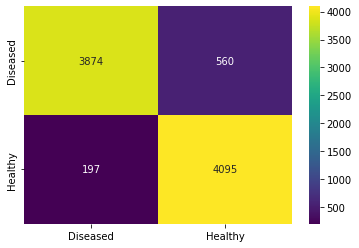

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/gdrive')
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
labels = ['Diseased', 'Healthy']
confusion=sns.heatmap(cm ,annot=True, fmt ='g', xticklabels=labels, yticklabels=labels,cmap="viridis")
figure = confusion.get_figure()    
figure.savefig('confusion_CNN100.pdf', dpi=800)
print(cm)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
[[3874  560]
 [ 197 4095]]


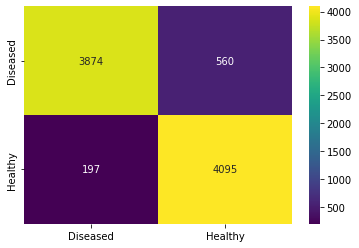

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
labels = ['Diseased', 'Healthy']
confusion=sns.heatmap(cm ,annot=True, fmt ='g', xticklabels=labels, yticklabels=labels,cmap="viridis")
figure = confusion.get_figure()    
figure.savefig('confusion_CNN100.pdf', dpi=800)
print(cm)

ROC:  0.9139019274512252
AUC:  0.9139019274512252


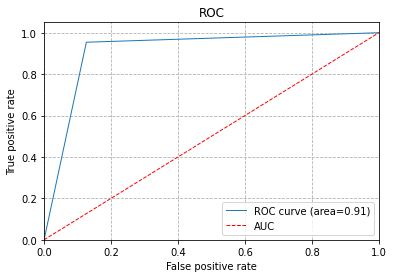

In [ ]:
################--TESTED--#########################
#REFER TO: https://towardsdatascience.com/10-minutes-to-building-a-fully-connected-binary-image-classifier-in-tensorflow-d88062e1247f
# https://colab.research.google.com/drive/1HgaywLtvIJZ8B9F8oWML772CfxL6UB0p?usp=sharing
#ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset17/Test',
#                                                  target_size = (224, 224),
#                                                  batch_size = 16,
#                                                  class_mode = 'categorical',
#                                                   shuffle=False)

# val_set.reset()

# preds = model.predict(val_set, verbose=1)
# preds = np.argmax(preds, axis=1)


#y_proba = model.predict_proba(X_test)
preds = y_pred
fpr, tpr, _ = roc_curve(val_set.classes, preds)
AUC = roc_auc_score(val_set.classes, preds)


roc_auc = auc(fpr, tpr)

print("ROC: ", roc_auc)
print("AUC: ", AUC)

plt.figure()
lw = 1
plt.plot(fpr,tpr,color='#1F77B4',lw=lw, label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],linestyle='--', lw=lw,color='r', label = 'AUC')
#plt.plot(fpr,tpr, color='r',linestyle='--', lw=lw, label='ROC curve (area=%0.2f)' % roc_auc)
#plt.fill(fpr, tpr, color='#1F77B4', label = 'AUC')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
from matplotlib import pyplot
pyplot.grid(linestyle='--')
plt.savefig('roc-aucCNN100epochs.pdf',format='pdf', dpi=800)
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
# Verifing our Model by giving samples of cell to detect 
# test_image = image.load_img('/content/drive/MyDrive/Dataset/single_prediction/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG', target_size = (64, 64))
test_image = image.load_img('/content/gdrive/MyDrive/2022dataset 05 2 22/validation/1.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
if result[0][0] == 1:
    prediction = 'Healthy'#1 check this line of code later
else:
    prediction = 'Deseased'#0 check this line of code later
print("The prediction result is :", prediction)



import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_lossCNN')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accCNN')

